In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from tqdm import tqdm
import librosa as lb
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
!pip3 install catboost
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
from sklearn import metrics
from sklearn.metrics import accuracy_score

Mounted at /content/drive/
     |████████████████████████████████| 69.2 MB 5.3 kB/s 


#Plot Feature Importance Function

In [ ]:
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(20,30))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + ' FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')    

# Dataset

In [ ]:
GPS_train=pd.read_csv("/content/drive/MyDrive/SHL 2021/Train/GPS/GPS with Label.csv", low_memory=False)
GPS_train.head()

,Epoch time[ms],ID1,SNR1,Azimuth1,Elevation1,ID2,SNR2,Azimuth2,Elevation2,ID3,SNR3,Azimuth3,Elevation3,ID4,SNR4,Azimuth4,Elevation4,ID5,SNR5,Azimuth5,Elevation5,ID6,SNR6,Azimuth6,Elevation6,ID7,SNR7,Azimuth7,Elevation7,ID8,SNR8,Azimuth8,Elevation8,ID9,SNR9,Azimuth9,Elevation9,ID10,SNR10,Azimuth10,...,Azimuth14,Elevation14,ID15,SNR15,Azimuth15,Elevation15,ID16,SNR16,Azimuth16,Elevation16,ID17,SNR17,Azimuth17,Elevation17,ID18,SNR18,Azimuth18,Elevation18,ID19,SNR19,Azimuth19,Elevation19,ID20,SNR20,Azimuth20,Elevation20,ID21,SNR21,Azimuth21,Elevation21,ID22,SNR22,Azimuth22,Elevation22,ID23,SNR23,Azimuth23,Elevation23,N,Label
0,1490431583027,9.0,25.0,0.0,1.0,28.0,16.0,0.0,1.0,30.0,29.0,0.0,1.0,163.0,20.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,4
1,1490431584029,9.0,25.0,0.0,1.0,28.0,15.0,0.0,1.0,30.0,29.0,0.0,1.0,163.0,20.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,4
2,1490431585029,9.0,25.0,0.0,1.0,28.0,15.0,0.0,1.0,30.0,29.0,0.0,1.0,163.0,20.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,4
3,1490431586028,9.0,25.0,0.0,1.0,28.0,15.0,0.0,1.0,30.0,28.0,0.0,1.0,163.0,20.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,4
4,1490431587139,9.0,25.0,0.0,1.0,28.0,15.0,0.0,1.0,30.0,28.0,0.0,1.0,163.0,19.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,4


In [ ]:
GPS_val=pd.read_csv("/content/drive/MyDrive/SHL 2021/Validate/GPS/GPS with Label.csv", low_memory=False)
GPS_val.head()

,Epoch time[ms],ID1,SNR1,Azimuth1,Elevation1,ID2,SNR2,Azimuth2,Elevation2,ID3,SNR3,Azimuth3,Elevation3,ID4,SNR4,Azimuth4,Elevation4,ID5,SNR5,Azimuth5,Elevation5,ID6,SNR6,Azimuth6,Elevation6,ID7,SNR7,Azimuth7,Elevation7,ID8,SNR8,Azimuth8,Elevation8,ID9,SNR9,Azimuth9,Elevation9,ID10,SNR10,Azimuth10,Elevation10,ID11,SNR11,Azimuth11,Elevation11,ID12,SNR12,Azimuth12,Elevation12,ID13,SNR13,Azimuth13,Elevation13,ID14,SNR14,Azimuth14,Elevation14,ID15,SNR15,Azimuth15,Elevation15,ID16,SNR16,Azimuth16,Elevation16,ID17,SNR17,Azimuth17,Elevation17,ID18,SNR18,Azimuth18,Elevation18,ID19,SNR19,Azimuth19,Elevation19,N,Label
0,1497427493155,10.0,19.0,285.0,24.0,12.0,25.0,219.0,59.0,13.0,30.0,148.0,14.0,15.0,27.0,177.0,43.0,17.0,39.0,54.0,31.0,19.0,37.0,81.0,39.0,24.0,27.0,335.0,86.0,25.0,22.0,230.0,18.0,32.0,21.0,315.0,16.0,157.0,23.0,71.0,17.0,160.0,17.0,280.0,47.0,163.0,18.0,285.0,51.0,164.0,28.0,51.0,54.0,166.0,29.0,42.0,28.0,168.0,32.0,102.0,29.0,169.0,27.0,334.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,3
1,1497427494166,10.0,20.0,285.0,24.0,12.0,25.0,219.0,59.0,13.0,29.0,148.0,14.0,15.0,27.0,177.0,43.0,17.0,39.0,54.0,31.0,19.0,37.0,81.0,39.0,24.0,27.0,335.0,86.0,25.0,22.0,230.0,18.0,32.0,23.0,315.0,16.0,157.0,22.0,71.0,17.0,160.0,17.0,280.0,47.0,163.0,18.0,285.0,51.0,164.0,28.0,51.0,54.0,166.0,34.0,42.0,28.0,168.0,32.0,102.0,29.0,169.0,29.0,334.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,3
2,1497427495150,10.0,23.0,285.0,24.0,12.0,25.0,219.0,59.0,13.0,28.0,148.0,14.0,15.0,27.0,177.0,43.0,17.0,39.0,54.0,31.0,19.0,36.0,81.0,39.0,24.0,27.0,335.0,86.0,25.0,24.0,230.0,18.0,32.0,34.0,315.0,16.0,157.0,22.0,71.0,17.0,160.0,17.0,280.0,47.0,163.0,18.0,285.0,51.0,164.0,28.0,51.0,54.0,166.0,35.0,42.0,28.0,168.0,31.0,102.0,29.0,169.0,35.0,334.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,3
3,1497427496160,10.0,22.0,285.0,24.0,12.0,32.0,219.0,59.0,13.0,27.0,148.0,14.0,15.0,27.0,177.0,43.0,17.0,38.0,54.0,30.0,19.0,36.0,81.0,39.0,24.0,26.0,336.0,86.0,25.0,31.0,230.0,18.0,32.0,35.0,315.0,16.0,157.0,21.0,71.0,17.0,160.0,16.0,280.0,47.0,163.0,17.0,285.0,51.0,164.0,27.0,51.0,54.0,166.0,34.0,42.0,28.0,168.0,30.0,102.0,29.0,169.0,35.0,334.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,3
4,1497427497160,10.0,22.0,285.0,24.0,12.0,33.0,219.0,59.0,13.0,27.0,148.0,14.0,15.0,30.0,177.0,43.0,17.0,37.0,54.0,30.0,19.0,34.0,81.0,39.0,24.0,26.0,336.0,86.0,25.0,31.0,230.0,18.0,32.0,34.0,315.0,16.0,157.0,20.0,71.0,17.0,160.0,16.0,280.0,47.0,163.0,17.0,285.0,51.0,164.0,27.0,51.0,54.0,166.0,33.0,42.0,28.0,168.0,30.0,102.0,29.0,169.0,35.0,334.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,3


In [ ]:
GPS_test=pd.read_csv("/content/drive/MyDrive/SHL 2021/Test/GPS/GPS- gonna give label.csv", low_memory=False)
GPS_test.head()

,Epoch time[ms],Ignore1,Ignore2,ID1,SNR1,Azimuth1,Elevation1,ID2,SNR2,Azimuth2,Elevation2,ID3,SNR3,Azimuth3,Elevation3,ID4,SNR4,Azimuth4,Elevation4,ID5,SNR5,Azimuth5,Elevation5,ID6,SNR6,Azimuth6,Elevation6,ID7,SNR7,Azimuth7,Elevation7,ID8,SNR8,Azimuth8,Elevation8,ID9,SNR9,Azimuth9,Elevation9,ID10,...,Azimuth13,Elevation13,ID14,SNR14,Azimuth14,Elevation14,ID15,SNR15,Azimuth15,Elevation15,ID16,SNR16,Azimuth16,Elevation16,ID17,SNR17,Azimuth17,Elevation17,ID18,SNR18,Azimuth18,Elevation18,ID19,SNR19,Azimuth19,Elevation19,ID20,SNR20,Azimuth20,Elevation20,ID21,SNR21,Azimuth21,Elevation21,ID22,SNR22,Azimuth22,Elevation22,N,ache=1+nai=0
0,2496835247634,962366279416,120570372255,31.0,21.0,302.0,43.0,164.0,25.0,308.0,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1
1,2496835248042,962774320041,120570372255,31.0,20.0,302.0,43.0,164.0,24.0,308.0,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1
2,2496835249046,963778774208,120570372255,14.0,12.0,263.0,38.0,31.0,20.0,302.0,43.0,164.0,23.0,308.0,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1
3,2496835250050,964782264312,120570372255,31.0,19.0,302.0,43.0,164.0,22.0,308.0,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1
4,2496835251051,965783812228,120570372255,31.0,19.0,302.0,43.0,164.0,21.0,308.0,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1


In [ ]:
print(len(GPS_train))
print(len(GPS_val))
print(len(GPS_test))

892671
83548
620452


In [ ]:
print(GPS_train["N"].mean())
print(GPS_val["N"].mean())
print(GPS_test["N"].mean())

11.472290463115751
11.493189543735339
11.20122265703068


In [ ]:
GPS_train.apply(lambda x: x.fillna(x.mean(),inplace=True),axis=0)
GPS_val.apply(lambda x: x.fillna(x.mean(),inplace=True),axis=0)

In [ ]:
y_train=GPS_train["Label"].values
y_val=GPS_val["Label"].values

n_train=GPS_train["N"]
n_val=GPS_val["N"]

GPS_train=GPS_train.iloc[:,0:45]
GPS_train["N"]=n_train

GPS_val=GPS_val.iloc[:,0:45]
GPS_val["N"]=n_val

x_train=GPS_train.values
x_val=GPS_val.values

# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_val)

print(accuracy_score(y_val,y_pred))
print(metrics.classification_report(y_val, y_pred))

0.20908938574232777
              precision    recall  f1-score   support

           1       0.11      0.01      0.02     14581
           2       0.47      0.21      0.29     17913
           3       0.00      0.00      0.00       914
           4       0.35      0.39      0.37     10783
           5       0.18      0.48      0.26     13899
           6       0.10      0.49      0.17      4212
           7       0.49      0.05      0.08     12138
           8       0.00      0.00      0.00      9108

    accuracy                           0.21     83548
   macro avg       0.21      0.20      0.15     83548
weighted avg       0.27      0.21      0.18     83548



#XGBoost Classifier

In [ ]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
clf=xgb.XGBClassifier()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_val)

print(accuracy_score(y_val,y_pred))
print(metrics.classification_report(y_val, y_pred))

0.2629626083209652
              precision    recall  f1-score   support

           1       0.60      0.14      0.22     14581
           2       0.28      0.18      0.22     17913
           3       0.00      0.00      0.00       914
           4       0.42      0.37      0.39     10783
           5       0.24      0.91      0.38     13899
           6       0.03      0.02      0.02      4212
           7       0.00      0.00      0.00     12138
           8       0.00      0.00      0.00      9108

    accuracy                           0.26     83548
   macro avg       0.20      0.20      0.15     83548
weighted avg       0.26      0.26      0.20     83548



# Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_val)

print(accuracy_score(y_val,y_pred))
print(metrics.classification_report(y_val, y_pred))

0.2116986642409154
              precision    recall  f1-score   support

           1       0.34      0.17      0.22     14581
           2       0.28      0.11      0.16     17913
           3       0.00      0.02      0.01       914
           4       0.29      0.22      0.25     10783
           5       0.20      0.73      0.32     13899
           6       0.05      0.07      0.06      4212
           7       0.37      0.04      0.07     12138
           8       0.00      0.00      0.00      9108

    accuracy                           0.21     83548
   macro avg       0.19      0.17      0.14     83548
weighted avg       0.25      0.21      0.17     83548



# Extra Trees Classifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
clf=ExtraTreesClassifier()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_val)

print(accuracy_score(y_val,y_pred))
print(metrics.classification_report(y_val, y_pred))

0.2075812706468138
              precision    recall  f1-score   support

           1       0.24      0.03      0.06     14581
           2       0.51      0.23      0.31     17913
           3       0.00      0.00      0.00       914
           4       0.28      0.39      0.32     10783
           5       0.14      0.16      0.15     13899
           6       0.08      0.62      0.15      4212
           7       0.51      0.31      0.38     12138
           8       0.00      0.00      0.00      9108

    accuracy                           0.21     83548
   macro avg       0.22      0.22      0.17     83548
weighted avg       0.29      0.21      0.21     83548



#AdaBoost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
clf= AdaBoostClassifier(n_estimators=100)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_val)

print(accuracy_score(y_val,y_pred))
print(metrics.classification_report(y_val, y_pred))

0.1721046583999617
              precision    recall  f1-score   support

           1       0.15      0.24      0.19     14581
           2       0.45      0.12      0.19     17913
           3       0.00      0.00      0.00       914
           4       0.55      0.58      0.56     10783
           5       0.00      0.00      0.00     13899
           6       0.06      0.60      0.12      4212
           7       0.00      0.00      0.00     12138
           8       0.00      0.00      0.00      9108

    accuracy                           0.17     83548
   macro avg       0.15      0.19      0.13     83548
weighted avg       0.20      0.17      0.15     83548



#CatBoost Classifier

In [ ]:
!pip3 install catboost
from catboost import CatBoostClassifier
clf= CatBoostClassifier()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_val)

In [ ]:
print(accuracy_score(y_val,y_pred))
print(metrics.classification_report(y_val, y_pred))

0.25669076459041507
              precision    recall  f1-score   support

           1       0.39      0.24      0.30     14581
           2       0.32      0.20      0.25     17913
           3       0.00      0.00      0.00       914
           4       0.43      0.43      0.43     10783
           5       0.20      0.65      0.31     13899
           6       0.13      0.16      0.14      4212
           7       0.00      0.00      0.00     12138
           8       0.00      0.00      0.00      9108

    accuracy                           0.26     83548
   macro avg       0.19      0.21      0.18     83548
weighted avg       0.23      0.26      0.22     83548



# Feature Extraction

In [ ]:
class feature_extraction:
  def __init__(self,path,window_len,overlap,val):
    self.path=path
    self.window_len=window_len
    self.overlap=overlap
    self.val=val

  def load_data(self):
        df = pd.read_csv(self.path,low_memory=False)
        lab=df['Label']
        n=df["N"]
        df=df.iloc[:,0:45]
        df["N"]=n

        df=df.iloc[:,:46]

        df=pd.concat([df,lab],axis=1)
        for i in range(1,12):
          s='SNR'+str(i)
          df[s]=df[s].fillna(df[s].mean())
        return df

  def process_label(self,df):
        label = []
        d = 0
        delta = int(np.floor(self.window_len * (1 - self.overlap)))
        num_window = int(np.floor(df.shape[0] / delta)) - \
        (int(np.floor(self.window_len /delta)) - 1)
        for t in tqdm(range(num_window), desc='Processing The Label File   '):
            x = df.loc[d:(d + self.window_len), 'Label'].values
            d = d + delta
            temp = np.array([sp.stats.mode(x)[0]])
            if t == 0:
                label = temp
            else:
                label = np.concatenate([label, temp])
        return label

  def get_statistical_features(self, df, axis='SNR1'):
        features = []
        d = 0
        delta = int(np.floor(self.window_len * (1 - self.overlap)))
        num_window = int(np.floor(df.shape[0] / delta)) - \
        (int(np.floor(self.window_len /delta)) - 1)
        for t in tqdm(range(num_window), desc='Calculating ' + axis +  ' Axis Features '):
            x = df.loc[d:(d + self.window_len), axis].values
            d = d + delta
            min = np.min(x)
            max = np.max(x)
            std = np.std(x)
            avg = np.mean(x)
            var = np.var(x)
            ptp = np.ptp(x)
            mrc = np.max(np.diff(x))
            arc = np.mean(np.diff(x))
            src = np.std(np.diff(x))
            #mad = sp.stats.median_absolute_deviation(x)
            iqr = sp.stats.iqr(x)
            cor = np.correlate(x, x)[0]
            #mcr = lb.feature.zero_crossing_rate(x - avg)[0, 0]
            rms = np.sum(np.square(x)) / x.shape[0]
            vel = np.trapz(x) / x.shape[0]
            temp = np.array([[min, max, std, avg, var, ptp, mrc, arc,
                            src, iqr, cor, rms, vel]])
            if t == 0:
                features = temp
            else:
                features = np.concatenate([features, temp])
        return features

  def get_time(self, df):
        time = []
        d = 0
        delta = int(np.floor(self.window_len * (1 - self.overlap)))
        num_window = int(np.floor(df.shape[0] / delta)) - \
        (int(np.floor(self.window_len /delta)) - 1)
        for t in tqdm(range(num_window), desc='Calculating ' + 'Epoch time[ms]' +  ' Axis Features '):
            x = df.loc[d:(d + self.window_len), 'Epoch time[ms]'].values
            d = d + delta
            min = np.min(x)
            max = np.max(x)
            std = np.std(x)
            avg = np.mean(x)
            var = np.var(x)
            temp = np.array([[min, max, std, avg, var]])
            if t == 0:
                time = temp
            else:
                time = np.concatenate([time, temp])
        return time

  def process_N(self,df,axis='N'):
        N = []
        d = 0
        delta = int(np.floor(self.window_len * (1 - self.overlap)))
        num_window = int(np.floor(df.shape[0] / delta)) - \
        (int(np.floor(self.window_len /delta)) - 1)
        for t in tqdm(range(num_window), desc='Calculating ' + axis +  ' Axis Features '):
            x = df.loc[d:(d + self.window_len), 'N'].values
            d = d + delta
            temp = np.array([sp.stats.mode(x)[0]])
            if t == 0:
                N = temp
            else:
                N = np.concatenate([N, temp])
        return N

  def extract(self, labelled=True):
        df = self.load_data()
        stat_time=self.get_time(df)
        stat_N=self.process_N(df)
        stat_SNR1=self.get_statistical_features(df,axis='SNR1')
        stat_SNR2=self.get_statistical_features(df,axis='SNR2')
        stat_SNR3=self.get_statistical_features(df,axis='SNR3')
        stat_SNR4=self.get_statistical_features(df,axis='SNR4')
        stat_SNR5=self.get_statistical_features(df,axis='SNR5')
        stat_SNR6=self.get_statistical_features(df,axis='SNR6')
        stat_SNR7=self.get_statistical_features(df,axis='SNR7')
        stat_SNR8=self.get_statistical_features(df,axis='SNR8')
        stat_SNR9=self.get_statistical_features(df,axis='SNR9')
        stat_SNR10=self.get_statistical_features(df,axis='SNR10')
        stat_SNR11=self.get_statistical_features(df,axis='SNR11')

        stat_E1=self.get_statistical_features(df,axis='Elevation1')
        stat_E2=self.get_statistical_features(df,axis='Elevation2')
        stat_E3=self.get_statistical_features(df,axis='Elevation3')
        stat_E4=self.get_statistical_features(df,axis='Elevation4')
        stat_E5=self.get_statistical_features(df,axis='Elevation5')
        stat_E6=self.get_statistical_features(df,axis='Elevation6')
        stat_E7=self.get_statistical_features(df,axis='Elevation7')
        stat_E8=self.get_statistical_features(df,axis='Elevation8')
        stat_E9=self.get_statistical_features(df,axis='Elevation9')
        stat_E10=self.get_statistical_features(df,axis='Elevation10')
        stat_E11=self.get_statistical_features(df,axis='Elevation11')

        stat_A1=self.get_statistical_features(df,axis='Azimuth1')
        stat_A2=self.get_statistical_features(df,axis='Azimuth2')
        stat_A3=self.get_statistical_features(df,axis='Azimuth3')
        stat_A4=self.get_statistical_features(df,axis='Azimuth4')
        stat_A5=self.get_statistical_features(df,axis='Azimuth5')
        stat_A6=self.get_statistical_features(df,axis='Azimuth6')
        stat_A7=self.get_statistical_features(df,axis='Azimuth7')
        stat_A8=self.get_statistical_features(df,axis='Azimuth8')
        stat_A9=self.get_statistical_features(df,axis='Azimuth9')
        stat_A10=self.get_statistical_features(df,axis='Azimuth10')
        stat_A11=self.get_statistical_features(df,axis='Azimuth11')


        if labelled:
            label = self.process_label(df)
            features = np.concatenate([stat_time,stat_N,stat_SNR1,stat_SNR2, stat_SNR3,stat_SNR4,stat_SNR5,stat_SNR6,stat_SNR7,stat_SNR8,stat_SNR9,stat_SNR10,stat_SNR11,stat_E1,stat_E2,stat_E3,stat_E4,stat_E5,stat_E6,stat_E7,stat_E8,stat_E9,stat_E10,stat_E11,stat_A1,stat_A2,stat_A3,stat_A4,stat_A5,stat_A6,stat_A7,stat_A8,stat_A9,stat_A10,stat_A11,label], axis=1)
        else:
            features = np.concatenate([stat_time,stat_N,stat_SNR1,stat_SNR2, stat_SNR3,stat_SNR4,stat_SNR5,stat_SNR6,stat_SNR7,stat_SNR8,stat_SNR9,stat_SNR10,stat_SNR11,stat_E1,stat_E2,stat_E3,stat_E4,stat_E5,stat_E6,stat_E7,stat_E8,stat_E9,stat_E10,stat_E11,stat_A1,stat_A2,stat_A3,stat_A4,stat_A5,stat_A6,stat_A7,stat_A8,stat_A9,stat_A10,stat_A11], axis=1)
        return features

# Train

In [ ]:
path='/content/drive/MyDrive/COMPETITIONS/SHL 2021/Train/GPS/GPS with Label.csv'
fe = feature_extraction(path, window_len=30, overlap=0,val=0)
features = fe.extract()

Processing The Label File   : 100%|██████████| 29755/29755 [00:06<00:00, 4893.90it/s]


In [ ]:
df_train = pd.DataFrame(features)
column_names='time_min time_max time_std time_avg time_var \
              N\
              SNR1_min SNR1_mam SNR1_std SNR1_avg SNR1_var SNR1_ptp SNR1_mrc SNR1_arc SNR1_src SNR1_iqr SNR1_cor SNR1_rms SNR1_vel \
              SNR2_min SNR2_mam SNR2_std SNR2_avg SNR2_var SNR2_ptp SNR2_mrc SNR2_arc SNR2_src SNR2_iqr SNR2_cor SNR2_rms SNR2_vel \
              SNR3_min SNR3_mam SNR3_std SNR3_avg SNR3_var SNR3_ptp SNR3_mrc SNR3_arc SNR3_src SNR3_iqr SNR3_cor SNR3_rms SNR3_vel \
              SNR4_min SNR4_mam SNR4_std SNR4_avg SNR4_var SNR4_ptp SNR4_mrc SNR4_arc SNR4_src SNR4_iqr SNR4_cor SNR4_rms SNR4_vel \
              SNR5_min SNR5_mam SNR5_std SNR5_avg SNR5_var SNR5_ptp SNR5_mrc SNR5_arc SNR5_src SNR5_iqr SNR5_cor SNR5_rms SNR5_vel \
              SNR6_min SNR6_mam SNR6_std SNR6_avg SNR6_var SNR6_ptp SNR6_mrc SNR6_arc SNR6_src SNR6_iqr SNR6_cor SNR6_rms SNR6_vel \
              SNR7_min SNR7_mam SNR7_std SNR7_avg SNR7_var SNR7_ptp SNR7_mrc SNR7_arc SNR7_src SNR7_iqr SNR7_cor SNR7_rms SNR7_vel \
              SNR8_min SNR8_mam SNR8_std SNR8_avg SNR8_var SNR8_ptp SNR8_mrc SNR8_arc SNR8_src SNR8_iqr SNR8_cor SNR8_rms SNR8_vel \
              SNR9_min SNR9_mam SNR9_std SNR9_avg SNR9_var SNR9_ptp SNR9_mrc SNR9_arc SNR9_src SNR9_iqr SNR9_cor SNR9_rms SNR9_vel \
              SNR10_min SNR10_mam SNR10_std SNR10_avg SNR10_var SNR10_ptp SNR10_mrc SNR10_arc SNR10_src SNR10_iqr SNR10_cor SNR10_rms SNR10_vel \
              SNR11_min SNR11_mam SNR11_std SNR11_avg SNR11_var SNR11_ptp SNR11_mrc SNR11_arc SNR11_src SNR11_iqr SNR11_cor SNR11_rms SNR11_vel \
              E1_min E1_mam E1_std E1_avg E1_var E1_ptp E1_mrc E1_arc E1_src E1_iqr E1_cor E1_rms E1_vel \
              E2_min E2_mam E2_std E2_avg E2_var E2_ptp E2_mrc E2_arc E2_src E2_iqr E2_cor E2_rms E2_vel \
              E3_min E3_mam E3_std E3_avg E3_var E3_ptp E3_mrc E3_arc E3_src E3_iqr E3_cor E3_rms E3_vel \
              E4_min E4_mam E4_std E4_avg E4_var E4_ptp E4_mrc E4_arc E4_src E4_iqr E4_cor E4_rms E4_vel \
              E5_min E5_mam E5_std E5_avg E5_var E5_ptp E5_mrc A5_arc E5_src E5_iqr E5_cor E5_rms E5_vel \
              E6_min E6_mam E6_std E6_avg E6_var E6_ptp E6_mrc E6_arc E6_src E6_iqr E6_cor E6_rms E6_vel \
              E7_min E7_mam E7_std E7_avg E7_var E7_ptp E7_mrc E7_arc E7_src E7_iqr E7_cor E7_rms E7_vel \
              E8_min E8_mam E8_std E8_avg E8_var E8_ptp E8_mrc E8_arc E8_src E8_iqr E8_cor E8_rms E8_vel \
              E9_min E9_mam E9_std E9_avg E9_var E9_ptp E9_mrc E9_arc E9_src E9_iqr E9_cor E9_rms E9_vel \
              E10_min E10_mam E10_std E10_avg E10_var E10_ptp E10_mrc E10_arc E10_src E10_iqr E10_cor E10_rms E10_vel \
              E11_min E11_mam E11_std E11_avg E11_var E11_ptp E11_mrc E11_arc E11_src E11_iqr E11_cor E11_rms E11_vel \
              A1_min A1_mam A1_std A1_avg A1_var A1_ptp A1_mrc A1_arc A1_src A1_iqr A1_cor A1_rms A1_vel \
              A2_min A2_mam A2_std A2_avg A2_var A2_ptp A2_mrc A2_arc A2_src A2_iqr A2_cor A2_rms A2_vel \
              A3_min A3_mam A3_std A3_avg A3_var A3_ptp A3_mrc A3_arc A3_src A3_iqr A3_cor A3_rms A3_vel \
              A4_min A4_mam A4_std A4_avg A4_var A4_ptp A4_mrc A4_arc A4_src A4_iqr A4_cor A4_rms A4_vel \
              A5_min A5_mam A5_std A5_avg A5_var A5_ptp A5_mrc A5_arc A5_src A5_iqr A5_cor A5_rms A5_vel \
              A6_min A6_mam A6_std A6_avg A6_var A6_ptp A6_mrc A6_arc A6_src A6_iqr A6_cor A6_rms A6_vel \
              A7_min A7_mam A7_std A7_avg A7_var A7_ptp A7_mrc A7_arc A7_src A7_iqr A7_cor A7_rms A7_vel \
              A8_min A8_mam A8_std A8_avg A8_var A8_ptp A8_mrc A8_arc A8_src A8_iqr A8_cor A8_rms A8_vel \
              A9_min A9_mam A9_std A9_avg A9_var A9_ptp A9_mrc A9_arc A9_src A9_iqr A9_cor A9_rms A9_vel \
              A10_min A10_mam A10_std A10_avg A10_var A10_ptp A10_mrc A10_arc A10_src A10_iqr A10_cor A10_rms A10_vel \
              A11_min A11_mam A11_std A11_avg A11_var A11_ptp A11_mrc A11_arc A11_src A11_iqr A11_cor A11_rms A11_vel \
              label'
df_train.columns = column_names.split()
df_train.fillna(0,inplace=True)

# Validation

In [ ]:
path_val='/content/drive/MyDrive/COMPETITIONS/SHL 2021/Validate/GPS/GPS with Label.csv'
fe2 =feature_extraction(path_val, window_len=30, overlap=0,val=1)
features = fe2.extract()

Processing The Label File   : 100%|██████████| 2784/2784 [00:00<00:00, 5096.59it/s]


In [ ]:
df_val = pd.DataFrame(features)
column_names='time_min time_max time_std time_avg time_var \
              N\
              SNR1_min SNR1_mam SNR1_std SNR1_avg SNR1_var SNR1_ptp SNR1_mrc SNR1_arc SNR1_src SNR1_iqr SNR1_cor SNR1_rms SNR1_vel \
              SNR2_min SNR2_mam SNR2_std SNR2_avg SNR2_var SNR2_ptp SNR2_mrc SNR2_arc SNR2_src SNR2_iqr SNR2_cor SNR2_rms SNR2_vel \
              SNR3_min SNR3_mam SNR3_std SNR3_avg SNR3_var SNR3_ptp SNR3_mrc SNR3_arc SNR3_src SNR3_iqr SNR3_cor SNR3_rms SNR3_vel \
              SNR4_min SNR4_mam SNR4_std SNR4_avg SNR4_var SNR4_ptp SNR4_mrc SNR4_arc SNR4_src SNR4_iqr SNR4_cor SNR4_rms SNR4_vel \
              SNR5_min SNR5_mam SNR5_std SNR5_avg SNR5_var SNR5_ptp SNR5_mrc SNR5_arc SNR5_src SNR5_iqr SNR5_cor SNR5_rms SNR5_vel \
              SNR6_min SNR6_mam SNR6_std SNR6_avg SNR6_var SNR6_ptp SNR6_mrc SNR6_arc SNR6_src SNR6_iqr SNR6_cor SNR6_rms SNR6_vel \
              SNR7_min SNR7_mam SNR7_std SNR7_avg SNR7_var SNR7_ptp SNR7_mrc SNR7_arc SNR7_src SNR7_iqr SNR7_cor SNR7_rms SNR7_vel \
              SNR8_min SNR8_mam SNR8_std SNR8_avg SNR8_var SNR8_ptp SNR8_mrc SNR8_arc SNR8_src SNR8_iqr SNR8_cor SNR8_rms SNR8_vel \
              SNR9_min SNR9_mam SNR9_std SNR9_avg SNR9_var SNR9_ptp SNR9_mrc SNR9_arc SNR9_src SNR9_iqr SNR9_cor SNR9_rms SNR9_vel \
              SNR10_min SNR10_mam SNR10_std SNR10_avg SNR10_var SNR10_ptp SNR10_mrc SNR10_arc SNR10_src SNR10_iqr SNR10_cor SNR10_rms SNR10_vel \
              SNR11_min SNR11_mam SNR11_std SNR11_avg SNR11_var SNR11_ptp SNR11_mrc SNR11_arc SNR11_src SNR11_iqr SNR11_cor SNR11_rms SNR11_vel \
              E1_min E1_mam E1_std E1_avg E1_var E1_ptp E1_mrc E1_arc E1_src E1_iqr E1_cor E1_rms E1_vel \
              E2_min E2_mam E2_std E2_avg E2_var E2_ptp E2_mrc E2_arc E2_src E2_iqr E2_cor E2_rms E2_vel \
              E3_min E3_mam E3_std E3_avg E3_var E3_ptp E3_mrc E3_arc E3_src E3_iqr E3_cor E3_rms E3_vel \
              E4_min E4_mam E4_std E4_avg E4_var E4_ptp E4_mrc E4_arc E4_src E4_iqr E4_cor E4_rms E4_vel \
              E5_min E5_mam E5_std E5_avg E5_var E5_ptp E5_mrc A5_arc E5_src E5_iqr E5_cor E5_rms E5_vel \
              E6_min E6_mam E6_std E6_avg E6_var E6_ptp E6_mrc E6_arc E6_src E6_iqr E6_cor E6_rms E6_vel \
              E7_min E7_mam E7_std E7_avg E7_var E7_ptp E7_mrc E7_arc E7_src E7_iqr E7_cor E7_rms E7_vel \
              E8_min E8_mam E8_std E8_avg E8_var E8_ptp E8_mrc E8_arc E8_src E8_iqr E8_cor E8_rms E8_vel \
              E9_min E9_mam E9_std E9_avg E9_var E9_ptp E9_mrc E9_arc E9_src E9_iqr E9_cor E9_rms E9_vel \
              E10_min E10_mam E10_std E10_avg E10_var E10_ptp E10_mrc E10_arc E10_src E10_iqr E10_cor E10_rms E10_vel \
              E11_min E11_mam E11_std E11_avg E11_var E11_ptp E11_mrc E11_arc E11_src E11_iqr E11_cor E11_rms E11_vel \
              A1_min A1_mam A1_std A1_avg A1_var A1_ptp A1_mrc A1_arc A1_src A1_iqr A1_cor A1_rms A1_vel \
              A2_min A2_mam A2_std A2_avg A2_var A2_ptp A2_mrc A2_arc A2_src A2_iqr A2_cor A2_rms A2_vel \
              A3_min A3_mam A3_std A3_avg A3_var A3_ptp A3_mrc A3_arc A3_src A3_iqr A3_cor A3_rms A3_vel \
              A4_min A4_mam A4_std A4_avg A4_var A4_ptp A4_mrc A4_arc A4_src A4_iqr A4_cor A4_rms A4_vel \
              A5_min A5_mam A5_std A5_avg A5_var A5_ptp A5_mrc A5_arc A5_src A5_iqr A5_cor A5_rms A5_vel \
              A6_min A6_mam A6_std A6_avg A6_var A6_ptp A6_mrc A6_arc A6_src A6_iqr A6_cor A6_rms A6_vel \
              A7_min A7_mam A7_std A7_avg A7_var A7_ptp A7_mrc A7_arc A7_src A7_iqr A7_cor A7_rms A7_vel \
              A8_min A8_mam A8_std A8_avg A8_var A8_ptp A8_mrc A8_arc A8_src A8_iqr A8_cor A8_rms A8_vel \
              A9_min A9_mam A9_std A9_avg A9_var A9_ptp A9_mrc A9_arc A9_src A9_iqr A9_cor A9_rms A9_vel \
              A10_min A10_mam A10_std A10_avg A10_var A10_ptp A10_mrc A10_arc A10_src A10_iqr A10_cor A10_rms A10_vel \
              A11_min A11_mam A11_std A11_avg A11_var A11_ptp A11_mrc A11_arc A11_src A11_iqr A11_cor A11_rms A11_vel \
              label'
df_val.columns = column_names.split()
df_val.fillna(0,inplace=True)

# Final Data

In [ ]:
x_train=df_train.iloc[:,:-1].values
y_train=df_train.loc[:,'label'].values
x_val=df_val.iloc[:,:-1].values
y_val=df_val.loc[:,'label'].values
columns=df_train.iloc[:,:-1].columns

# RANDOM FOREST CLASSIFIER

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=500)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_val)

print(accuracy_score(y_val,y_pred))
print(metrics.classification_report(y_val, y_pred))

0.3297413793103448
              precision    recall  f1-score   support

         1.0       0.61      0.23      0.33       486
         2.0       0.30      0.31      0.30       597
         3.0       0.00      0.00      0.00        30
         4.0       0.47      0.51      0.49       358
         5.0       0.27      0.73      0.39       464
         6.0       0.31      0.35      0.33       141
         7.0       0.40      0.09      0.14       404
         8.0       0.37      0.06      0.11       304

    accuracy                           0.33      2784
   macro avg       0.34      0.28      0.26      2784
weighted avg       0.39      0.33      0.30      2784



In [ ]:
from sklearn.metrics import confusion_matrix

cm=metrics.confusion_matrix(y_val,y_pred)
print(cm)

[[110  50   0  17 234  54  19   2]
 [ 26 183   9 146 185  24  11  13]
 [  0  10   0  12   2   6   0   0]
 [  0 155  13 182   6   2   0   0]
 [  0  78  10  23 340   9   1   3]
 [  5  17   0   6  52  49  12   0]
 [ 34   6   0   0 305   9  35  15]
 [  5 107   0   3 155   5  10  19]]


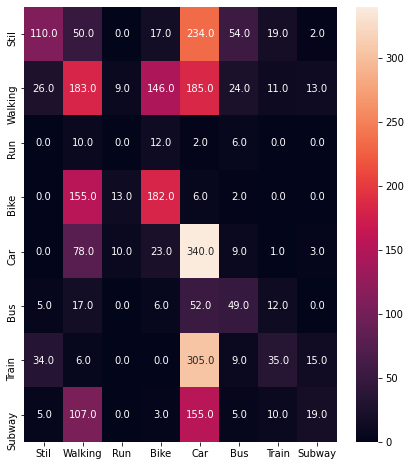

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(cm, index = [i for i in ['Stil','Walking','Run','Bike', 'Car', 'Bus', 'Train','Subway']],
                  columns = [i for i in ['Stil','Walking','Run','Bike', 'Car', 'Bus', 'Train','Subway']])
plt.figure(figsize = (7,8))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
sn.heatmap(df_cm, annot=True,fmt=".1f")
plt.savefig(fname="confusion matrix-GPS.png",dpi=600)

# XGB CLASSIFIER

In [ ]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
clf=xgb.XGBClassifier()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_val)

print(accuracy_score(y_val,y_pred))
print(metrics.classification_report(y_val, y_pred))

0.28879310344827586
              precision    recall  f1-score   support

         1.0       0.31      0.34      0.32       486
         2.0       0.31      0.24      0.27       597
         3.0       0.00      0.00      0.00        30
         4.0       0.39      0.28      0.33       358
         5.0       0.29      0.84      0.43       464
         6.0       0.05      0.03      0.04       141
         7.0       0.00      0.00      0.00       404
         8.0       0.00      0.00      0.00       304

    accuracy                           0.29      2784
   macro avg       0.17      0.22      0.17      2784
weighted avg       0.22      0.29      0.23      2784



# Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf= DecisionTreeClassifier()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_val)

print(accuracy_score(y_val,y_pred))
print(metrics.classification_report(y_val, y_pred))

0.25035919540229884
              precision    recall  f1-score   support

         1.0       0.38      0.18      0.25       486
         2.0       0.40      0.25      0.31       597
         3.0       0.04      0.13      0.06        30
         4.0       0.28      0.32      0.29       358
         5.0       0.21      0.63      0.32       464
         6.0       0.07      0.06      0.06       141
         7.0       0.32      0.10      0.15       404
         8.0       0.05      0.00      0.01       304

    accuracy                           0.25      2784
   macro avg       0.22      0.21      0.18      2784
weighted avg       0.28      0.25      0.23      2784



# EXTRA TREES CLASSIFIER

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
clf= ExtraTreesClassifier()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_val)

print(accuracy_score(y_val,y_pred))
print(metrics.classification_report(y_val, y_pred))

0.29920977011494254
              precision    recall  f1-score   support

         1.0       0.58      0.21      0.31       486
         2.0       0.35      0.24      0.28       597
         3.0       0.00      0.00      0.00        30
         4.0       0.41      0.54      0.46       358
         5.0       0.24      0.52      0.33       464
         6.0       0.15      0.55      0.24       141
         7.0       0.44      0.17      0.24       404
         8.0       0.22      0.03      0.06       304

    accuracy                           0.30      2784
   macro avg       0.30      0.28      0.24      2784
weighted avg       0.37      0.30      0.28      2784



# AdaBoost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
clf= AdaBoostClassifier(n_estimators=100)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_val)

print(accuracy_score(y_val,y_pred))
print(metrics.classification_report(y_val, y_pred))

0.21336206896551724
              precision    recall  f1-score   support

         1.0       0.21      0.56      0.30       486
         2.0       0.26      0.40      0.32       597
         3.0       0.00      0.00      0.00        30
         4.0       0.22      0.13      0.16       358
         5.0       0.00      0.00      0.00       464
         6.0       0.29      0.26      0.28       141
         7.0       0.00      0.00      0.00       404
         8.0       0.00      0.00      0.00       304

    accuracy                           0.21      2784
   macro avg       0.12      0.17      0.13      2784
weighted avg       0.14      0.21      0.16      2784



#CatBoost Classifier

In [ ]:
!pip3 install catboost
from catboost import CatBoostClassifier
clf= CatBoostClassifier()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_val)

In [ ]:
print(accuracy_score(y_val,y_pred))
print(metrics.classification_report(y_val, y_pred))

0.32363505747126436
              precision    recall  f1-score   support

         1.0       0.69      0.25      0.37       486
         2.0       0.27      0.30      0.28       597
         3.0       0.00      0.00      0.00        30
         4.0       0.41      0.51      0.46       358
         5.0       0.29      0.87      0.43       464
         6.0       0.19      0.11      0.14       141
         7.0       0.00      0.00      0.00       404
         8.0       0.00      0.00      0.00       304

    accuracy                           0.32      2784
   macro avg       0.23      0.25      0.21      2784
weighted avg       0.29      0.32      0.26      2784



#Test

In [ ]:
path_test = '/content/drive/MyDrive/SHL 2021/Validate/GPS/GPS with Label.csv'
fe3 = feature_extraction(path_test, window_len=30, overlap=0, val=0)
features = fe3.extract(labelled=False)

Calculating Azimuth11 Axis Features : 100%|██████████| 2784/2784 [00:02<00:00, 1269.28it/s]


In [ ]:
df_test = pd.DataFrame(features)
column_names='time_min time_max time_std time_avg time_var \
              N\
              SNR1_min SNR1_mam SNR1_std SNR1_avg SNR1_var SNR1_ptp SNR1_mrc SNR1_arc SNR1_src SNR1_iqr SNR1_cor SNR1_rms SNR1_vel \
              SNR2_min SNR2_mam SNR2_std SNR2_avg SNR2_var SNR2_ptp SNR2_mrc SNR2_arc SNR2_src SNR2_iqr SNR2_cor SNR2_rms SNR2_vel \
              SNR3_min SNR3_mam SNR3_std SNR3_avg SNR3_var SNR3_ptp SNR3_mrc SNR3_arc SNR3_src SNR3_iqr SNR3_cor SNR3_rms SNR3_vel \
              SNR4_min SNR4_mam SNR4_std SNR4_avg SNR4_var SNR4_ptp SNR4_mrc SNR4_arc SNR4_src SNR4_iqr SNR4_cor SNR4_rms SNR4_vel \
              SNR5_min SNR5_mam SNR5_std SNR5_avg SNR5_var SNR5_ptp SNR5_mrc SNR5_arc SNR5_src SNR5_iqr SNR5_cor SNR5_rms SNR5_vel \
              SNR6_min SNR6_mam SNR6_std SNR6_avg SNR6_var SNR6_ptp SNR6_mrc SNR6_arc SNR6_src SNR6_iqr SNR6_cor SNR6_rms SNR6_vel \
              SNR7_min SNR7_mam SNR7_std SNR7_avg SNR7_var SNR7_ptp SNR7_mrc SNR7_arc SNR7_src SNR7_iqr SNR7_cor SNR7_rms SNR7_vel \
              SNR8_min SNR8_mam SNR8_std SNR8_avg SNR8_var SNR8_ptp SNR8_mrc SNR8_arc SNR8_src SNR8_iqr SNR8_cor SNR8_rms SNR8_vel \
              SNR9_min SNR9_mam SNR9_std SNR9_avg SNR9_var SNR9_ptp SNR9_mrc SNR9_arc SNR9_src SNR9_iqr SNR9_cor SNR9_rms SNR9_vel \
              SNR10_min SNR10_mam SNR10_std SNR10_avg SNR10_var SNR10_ptp SNR10_mrc SNR10_arc SNR10_src SNR10_iqr SNR10_cor SNR10_rms SNR10_vel \
              SNR11_min SNR11_mam SNR11_std SNR11_avg SNR11_var SNR11_ptp SNR11_mrc SNR11_arc SNR11_src SNR11_iqr SNR11_cor SNR11_rms SNR11_vel \
              E1_min E1_mam E1_std E1_avg E1_var E1_ptp E1_mrc E1_arc E1_src E1_iqr E1_cor E1_rms E1_vel \
              E2_min E2_mam E2_std E2_avg E2_var E2_ptp E2_mrc E2_arc E2_src E2_iqr E2_cor E2_rms E2_vel \
              E3_min E3_mam E3_std E3_avg E3_var E3_ptp E3_mrc E3_arc E3_src E3_iqr E3_cor E3_rms E3_vel \
              E4_min E4_mam E4_std E4_avg E4_var E4_ptp E4_mrc E4_arc E4_src E4_iqr E4_cor E4_rms E4_vel \
              E5_min E5_mam E5_std E5_avg E5_var E5_ptp E5_mrc A5_arc E5_src E5_iqr E5_cor E5_rms E5_vel \
              E6_min E6_mam E6_std E6_avg E6_var E6_ptp E6_mrc E6_arc E6_src E6_iqr E6_cor E6_rms E6_vel \
              E7_min E7_mam E7_std E7_avg E7_var E7_ptp E7_mrc E7_arc E7_src E7_iqr E7_cor E7_rms E7_vel \
              E8_min E8_mam E8_std E8_avg E8_var E8_ptp E8_mrc E8_arc E8_src E8_iqr E8_cor E8_rms E8_vel \
              E9_min E9_mam E9_std E9_avg E9_var E9_ptp E9_mrc E9_arc E9_src E9_iqr E9_cor E9_rms E9_vel \
              E10_min E10_mam E10_std E10_avg E10_var E10_ptp E10_mrc E10_arc E10_src E10_iqr E10_cor E10_rms E10_vel \
              E11_min E11_mam E11_std E11_avg E11_var E11_ptp E11_mrc E11_arc E11_src E11_iqr E11_cor E11_rms E11_vel \
              A1_min A1_mam A1_std A1_avg A1_var A1_ptp A1_mrc A1_arc A1_src A1_iqr A1_cor A1_rms A1_vel \
              A2_min A2_mam A2_std A2_avg A2_var A2_ptp A2_mrc A2_arc A2_src A2_iqr A2_cor A2_rms A2_vel \
              A3_min A3_mam A3_std A3_avg A3_var A3_ptp A3_mrc A3_arc A3_src A3_iqr A3_cor A3_rms A3_vel \
              A4_min A4_mam A4_std A4_avg A4_var A4_ptp A4_mrc A4_arc A4_src A4_iqr A4_cor A4_rms A4_vel \
              A5_min A5_mam A5_std A5_avg A5_var A5_ptp A5_mrc A5_arc A5_src A5_iqr A5_cor A5_rms A5_vel \
              A6_min A6_mam A6_std A6_avg A6_var A6_ptp A6_mrc A6_arc A6_src A6_iqr A6_cor A6_rms A6_vel \
              A7_min A7_mam A7_std A7_avg A7_var A7_ptp A7_mrc A7_arc A7_src A7_iqr A7_cor A7_rms A7_vel \
              A8_min A8_mam A8_std A8_avg A8_var A8_ptp A8_mrc A8_arc A8_src A8_iqr A8_cor A8_rms A8_vel \
              A9_min A9_mam A9_std A9_avg A9_var A9_ptp A9_mrc A9_arc A9_src A9_iqr A9_cor A9_rms A9_vel \
              A10_min A10_mam A10_std A10_avg A10_var A10_ptp A10_mrc A10_arc A10_src A10_iqr A10_cor A10_rms A10_vel \
              A11_min A11_mam A11_std A11_avg A11_var A11_ptp A11_mrc A11_arc A11_src A11_iqr A11_cor A11_rms A11_vel'
              
df_test.columns = column_names.split()
df_test.fillna(0,inplace=True)

In [ ]:
df_test.columns[df_test.isnull().any()]

Index([], dtype='object')

In [ ]:
clf=RandomForestClassifier(n_estimators=500)
x_test=df_test.values
y_pred=clf.predict(x_test)

#Final Prediction

In [ ]:
y_pred_ext=[]
for i in range(len(y_pred)):
  for j in range(30):
    y_pred_ext.append(y_pred[i])

import collections
elements_count = collections.Counter(y_pred)
for key, value in elements_count.items():
   print(f"{key}: {value}") 

In [ ]:
b=len(cells_test)-len(y_pred_ext)
print(b)
for i in range(0,b):
  y_pred_ext.append(1)

prediction=list(y_pred_ext)
print('prediction length:    ',len(prediction))
print('gps test length:    ',len(GPS_test)) 

In [ ]:
from pandas import DataFrame
gps_prediction=DataFrame (prediction,columns=['GPS_Prediction'])
gps_prediction.to_csv("/content/drive/MyDrive/SHL 2021/Test/Label/GPS_Prediction.csv")